In [43]:
#please uncomment next line to install this package, before the run comment the library after the installation use this library
#install.packages(MASS) 
library(MASS)
# i use this library to solve sudo invesre proble

In [44]:
x_train<-read.table("optdigits.tra", sep ="," )
x_test<-read.table("optdigits.tes", sep = ",")
#read the data from test set and train set

In [45]:



y_train<-matrix(x_train[,65], nrow=3823, ncol=1)
y_test <-matrix(x_test[,65],nrow=1797, ncol=1)


X_test<- x_test[,(1:64)]
X_train <- x_train[,(1:64)]

#change to data frame      -i face with some problem when i use the data in normal mode-
df_train<-data.frame(X_train)
df_test<-data.frame(X_test)






In [46]:

for(i in 1:10)
{
    #here after getting the index of each class from sample_y we store this row in new matrix
    #and calculate the scatte matrix
    
  sample_y <- which(y_train==i-1)

  class_x <- df_train[sample_y,]
  k <- nrow(class_x) #size of each class #because size of classes is different in each step, for calculating scatter
    #matrix we have to use for
   mean_matrix <- matrix(0,ncol = 64,nrow = 10)
   mean_matrix_g <- matrix(0, ncol = 64,nrow = 10) #mean matrix for whole training data point
 
  mean_matrix[i,]<-apply(class_x,2,mean) #get means of each column 
  mean_matrix_g[i,]<-apply(df_train,2,mean)
    
  submat0 <- t(as.matrix(class_x)) - as.vector(mean_matrix[i,])
  submat0 <- t(submat0)
  
  scatt_with_mat <-matrix(0,nrow = 64, ncol = 64)
  scatt_with_mat <- scatt_with_mat + (t(submat0)%*%submat0)
  
  submat1 <- t(as.vector(mean_matrix[i,])-as.matrix(t(mean_matrix_g)))
  #apply scatter matrix
  scatt_class_matrix<-matrix(0,nrow = 64, ncol = 64)
  scatt_class_matrix <- scatt_class_matrix + (k*(as.matrix(t(submat1)%*%submat1)))


}


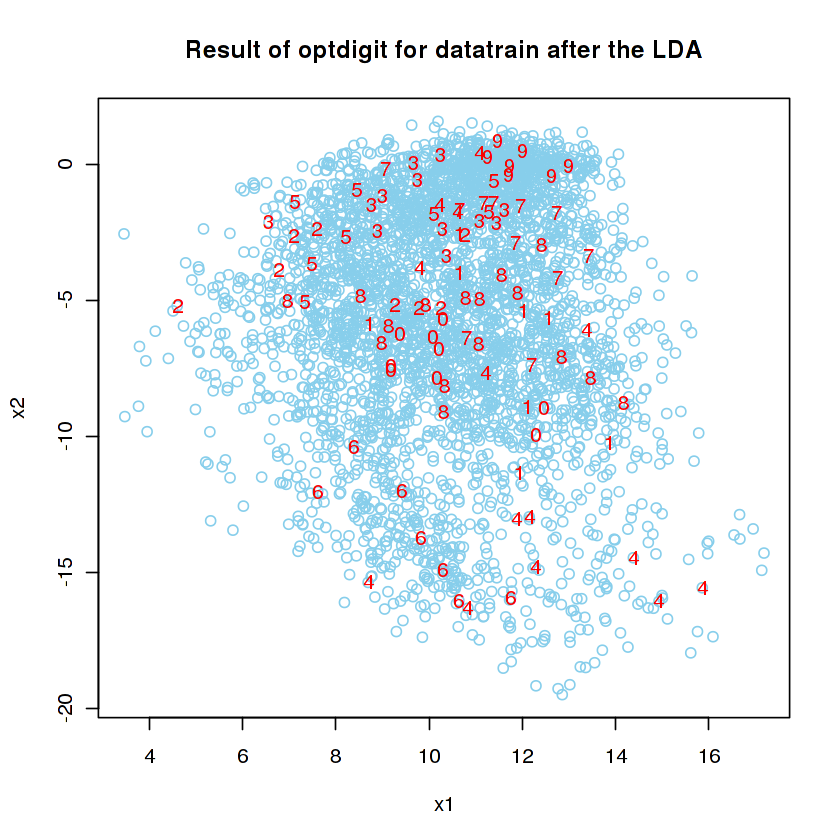

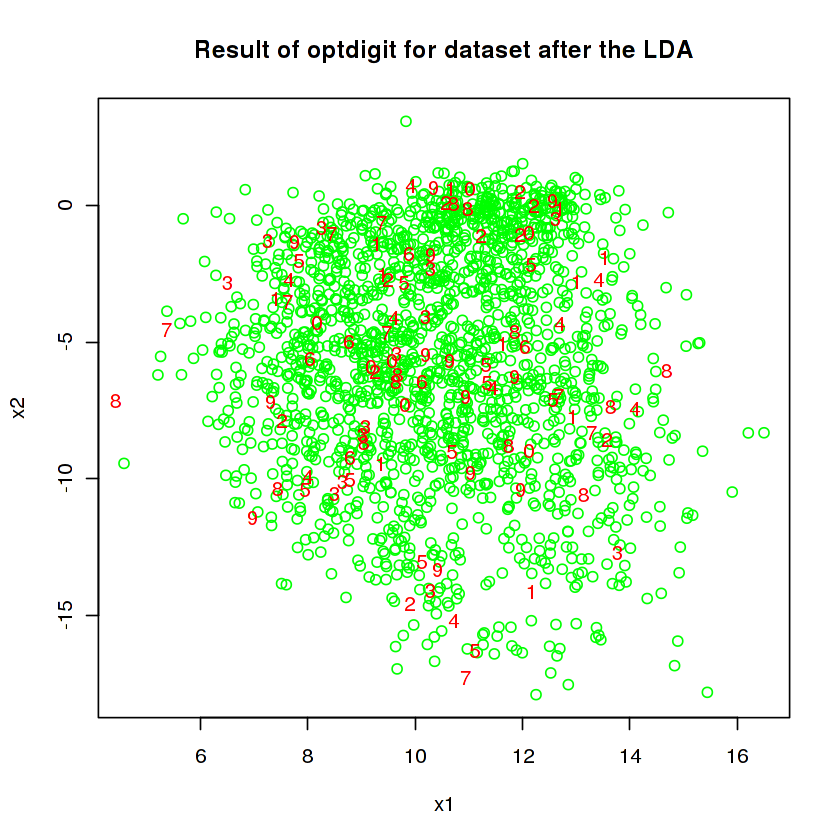

In [47]:

sudo_scatt_matrix <- ginv(scatt_with_mat)
dot_scatt <- sudo_scatt_matrix%*%scatt_class_matrix

scatt_value <- eigen(dot_scatt)
eig_scatter_value <- scatt_value$values #for eigen value
ScatterEigen_vectors <- scatt_value$vectors #for eigen vector

eig_value_scatt <- order(eig_scatter_value, decreasing=TRUE)
sort_scatt_eigenv <- eig_scatter_value[eig_value_scatt]
ScatterEigen_vectors_sorted <- ScatterEigen_vectors[,eig_value_scatt]

 # transoform our data points to the 2d space

transdorm_2d <- ScatterEigen_vectors_sorted[,1:2]
 # transoform our test set to the 2d space
new_select_f_train <- as.matrix(df_train)%*%transdorm_2d
new_select_f_test <- as.matrix(df_test)%*%transdorm_2d

# labeling our classes data point
# generate some ramdom integers to label some samples
tex_class_test <- sample(1:1797, 100, replace=FALSE) 
tex_class_train<- sample(1:3823, 100, replace=FALSE)


train_output_index <- y_train[tex_class_train,1]
test_output_index <-y_test[tex_class_test,1]

#plot the result for train set after LDA a
plot(new_select_f_train[,1],new_select_f_train[,2],xlab = "x1", ylab = "x2", col="skyblue",  main= "Result of optdigit for datatrain after the LDA")
text(new_select_f_train[tex_class_train,1], new_select_f_train[tex_class_train,2], labels=train_output_index, col = 'red')

#plot the result for test set after LDA
plot(new_select_f_test[,1],new_select_f_test[,2],xlab = "x1", ylab = "x2", col="green", main= "Result of optdigit for dataset after the LDA")
text(new_select_f_train[tex_class_test,1], new_select_f_train[tex_class_test,2], labels=test_output_index,col = 'red')
